Realizamos la conexion al telefono en el puerto 9999 corriendo el servidor en el telefono SL4A

In [13]:
!adb forward tcp:9999 tcp:49999

In [12]:
!adb devices

List of devices attached
02157df288f41912	device



Aplicación para los equipos siguientes en la línea de detección.

In [ ]:
%matplotlib inline
import time 
import android
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys, os,re
import pprint



def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	print  str(m)
	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	return m

Función para disparar la toma de 5 fotos para la detección del movimiento en caso de que se haya recibido el mensaje.

In [ ]:
def revisar(mensaje):
	droide=android.Android()
	counter=1
	delay=5
	numofShots = 5
	delayBetweenShots=8
	couterDecteccion=1
	droide.ttsSpeak('Esperando alerta')
	time.sleep(int(1))
	counter=0
	droide.ttsSpeak('Imagen con cambio')
	while counter <= int(numofShots):
		droide.ttsSpeak('Tomando foto carrete '+ str(counter))
		droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/programa/fotoC_'+ str(counter)+ '_.jpg',1,1)
		os.system('adb pull /sdcard/DCIM/CAMERA/programa/fotoC_'+ str(counter)+ '_.jpg')
		pic = os.path.join('.','fotoC_'+  str(counter)+ "_.jpg")
		counter +=1
		img2 =  cv2.imread(pic)
		plt.imshow(img2)
		time.sleep(int(1))
	print 'Hecho sin errores ...'
	del droide    
    

Función de detección del mensaje de aviso del equipo anterior en la línea de recepción

Intruso
Hecho sin errores ...


Result(id=2, result=None, error=None)

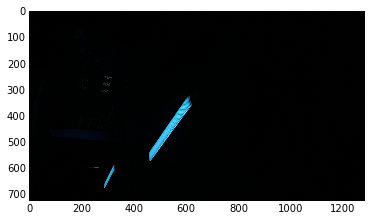

In [16]:
bandera=0
droide=android.Android()
while bandera==0:
    contador=0
    msgs = droide.smsGetMessages(False) 
    total=droide.smsGetMessageCount(False).result
    while contador <total:
#En la siguiente línea se ingresa el número del teléfono que envía el mensaje.
        if msgs.result[contador]['address']=='2281248059':
            mensaje= msgs.result[contador]['body']
            print mensaje
            revisar(mensaje)
            bandera=1
            break
        contador+=1
#En la siguiente línea se agrega el siguiente teléfono en la línea de detección.
droide.smsSend('2851087970', 'Intruso')    

In [22]:

import android



0
411
2299848788
1
411
UNOTV.COM
2
411
UNOTV.COM
3
411
TELCEL
4
411
5549998659
5
411
UNOTV.COM
6
411
2289884069
7
411
UNOTV.COM
8
411
UNOTV.COM
9
411
UNOTV.COM
10
411
UNOTV.COM
11
411
70808
12
411
26262
13
411
TELCEL
14
411
UNOTV.COM
15
411
UNOTV.COM
16
411
UNOTV.COM
17
411
UNOTV.COM
18
411
UNOTV.COM
19
411
UNOTV.COM
20
411
UNOTV.COM
21
411
UNOTV.COM
22
411
UNOTV.COM
23
411
UNOTV.COM
24
411
UNOTV.COM
25
411
TELCEL
26
411
UNOTV.COM
27
411
SANTANDER
28
411
SANTANDER
29
411
UNOTV.COM
30
411
UNOTV.COM
31
411
BANORTE
32
411
UNOTV.COM
33
411
SANTANDER
34
411
SANTANDER
35
411
SANTANDER
36
411
UNOTV.COM
37
411
UNOTV.COM
38
411
UNOTV.COM
39
411
UNOTV.COM
40
411
UNOTV.COM
41
411
UNOTV.COM
42
411
UNOTV.COM
43
411
UNOTV.COM
44
411
UNOTV.COM
45
411
UNOTV.COM
46
411
UNOTV.COM
47
411
UNOTV.COM
48
411
UNOTV.COM
49
411
SANTANDER
50
411
SANTANDER
51
411
UNOTV.COM
52
411
2281009698
53
411
UNOTV.COM
54
411
UNOTV.COM
55
411
UNOTV.COM
56
411
UNOTV.COM
57
411
UNOTV.COM
58
411
UNOTV.COM
59
411
SANTANDER
60
41